# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [3]:
df['flag_doente'] = (df['num'] != 0).astype('int64')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1


1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [5]:
df['sex'].replace({0: 'feminino', 1: 'masculino'}, inplace=True)
df['flag_doente'].replace({0: 'saudavel', 1: 'doente'}, inplace=True)

In [6]:
biv_tab_sex = pd.crosstab(df['sex'], df['flag_doente'], margins=True)
biv_tab_sex['media_doentes'] = biv_tab_sex['doente'] / biv_tab_sex['All']
biv_tab_sex['odds'] = biv_tab_sex['media_doentes'] / (1 - biv_tab_sex['media_doentes'])
biv_tab_sex['odds_ratio'] = biv_tab_sex['odds'] / biv_tab_sex.loc['All', 'odds']
biv_tab_sex['logito'] = np.log(biv_tab_sex['odds'])
biv_tab_sex['woe'] = np.log(biv_tab_sex['odds_ratio'])
biv_tab_sex

flag_doente,doente,saudavel,All,media_doentes,odds,odds_ratio,logito,woe
sex,,,,,,,,
feminino,25,72,97,0.257732,0.347222,0.409672,-1.057790,-0.892398
masculino,114,92,206,0.553398,1.239130,1.461996,0.214410,0.379802
All,139,164,303,0.458746,0.847561,1.000000,-0.165392,0.000000


2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [7]:
print(df.age.min())
print(df.age.max())
print(df.age.mean())

29.0
77.0
54.43894389438944


In [8]:
dif = 77-29
dif/5

9.6

In [9]:
bins = [29, 39, 49, 59, 69, 77]
labels = ['29 a 38 anos',
          '38 a 49 anos',
          '49 a 58 anos',
          '58 a 69 anos',
          '69 a 77 anos']

df['age_grupo'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente,age_grupo
0,63.0,masculino,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,saudavel,58 a 69 anos
1,67.0,masculino,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,doente,58 a 69 anos
2,67.0,masculino,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,doente,58 a 69 anos
3,37.0,masculino,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,saudavel,29 a 38 anos
4,41.0,feminino,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,saudavel,38 a 49 anos


In [11]:
tab_age = pd.crosstab(df['age_grupo'], df['flag_doente'], margins=True)
tab_age['media_doentes'] = tab_age['doente'] / tab_age['All']
tab_age['odds'] = tab_age['media_doentes'] / (1 - tab_age['media_doentes'])
tab_age['odds_ratio'] = tab_age['odds'] / tab_age.loc['All', 'odds']
tab_age['logito'] = np.log(tab_age['odds'])
tab_age['woe'] = np.log(tab_age['odds_ratio'])
tab_age

flag_doente,doente,saudavel,All,media_doentes,odds,odds_ratio,logito,woe
age_grupo,,,,,,,,
29 a 38 anos,3,8,11,0.272727,0.375000,0.445652,-0.980829,-0.808217
38 a 49 anos,21,50,71,0.295775,0.420000,0.499130,-0.867501,-0.694888
49 a 58 anos,53,63,116,0.456897,0.841270,0.999770,-0.172843,-0.000230
58 a 69 anos,57,35,92,0.619565,1.628571,1.935404,0.487703,0.660316
69 a 77 anos,4,8,12,0.333333,0.500000,0.594203,-0.693147,-0.520534
All,138,164,302,0.456954,0.841463,1.000000,-0.172613,0.000000


3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

Text(0, 0.5, 'Contagem')

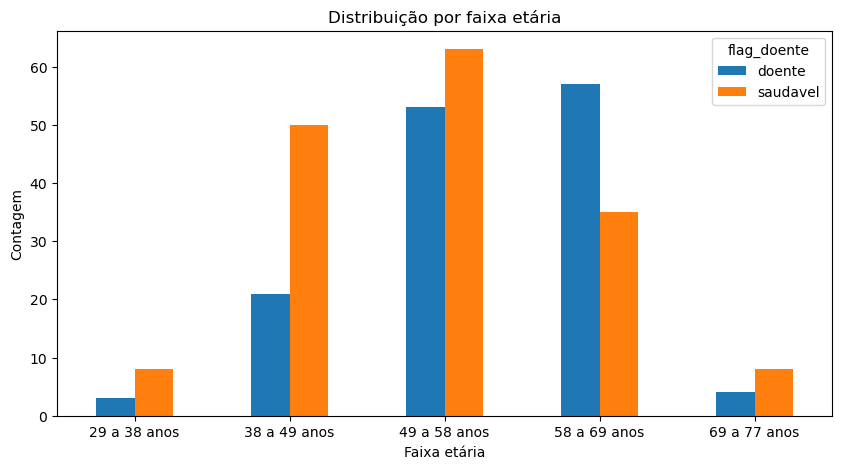

In [12]:
ax = tab_age[['doente', 'saudavel']].drop('All').plot.bar(rot=0, figsize=(10, 5))
ax.set_title("Distribuição por faixa etária")
ax.set_xlabel("Faixa etária")
ax.set_ylabel("Contagem")